In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.dummy import DummyClassifier
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore", category=RuntimeWarning)
import matplotlib as mpl
import matplotlib.pyplot as plt

In [194]:
movie_train = pd.read_csv('data/movies_train.csv')
movie_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [195]:
movie_test  = pd.read_csv('data/movies_test.csv')
movie_test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


# movies_test 변수 명
genre = 장르
release_time = 개봉일
time = 상영시간(분)
screening_rat = 상영등급
director
dir_prev_bfnum
dir_prev_num = 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)


In [196]:
movie_train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [197]:
movie_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


# # movies_train 결측치 처리

In [198]:
movie_train['dir_prev_bfnum'] = movie_train['dir_prev_bfnum'].fillna(0)

In [199]:
movie_train.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [200]:
#movie_train.drop(['title'], axis=1, inplace=True)

In [201]:
movie_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


# 변수별 시각화

## 한글 깨짐 처리

Yu Gothic
Franklin Gothic Medium
MS Gothic
Malgun Gothic
Yu Gothic
Malgun Gothic
Yu Gothic
Franklin Gothic Medium
Yu Gothic
Malgun Gothic


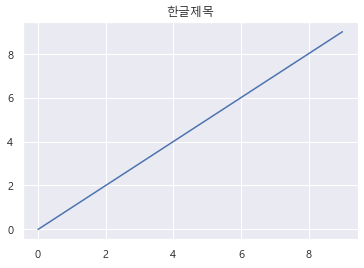

In [202]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
# 시스템폰트찾기
import matplotlib.font_manager as fm
for f in fm.fontManager.ttflist:
    if f.name.find('Gothic') != -1:
        print(f.name)
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'  #맑은 고딕으로 설정
rcParams['font.size'] = 10
# 한글 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure()
plt.plot(range(10))
plt.title('한글제목')
plt.show()

In [203]:
movie_train.corr()
# box_off_num는 num_staff와 time, dir_prev_bfnum , dir_prev_num 과 연관이 높음

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.266065,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.266065,1.000000,0.396616,0.369657,0.042491,0.293791
dir_prev_num,0.306727,0.396616,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.369657,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.042491,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.293791,0.259674,0.544265,0.111179,1.000000


# num_staff	num_actor 시작!

# 주연 배우 수에 따른 관객 수 시각화 ->num_actor 버림

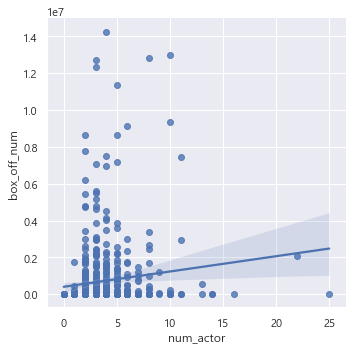

In [162]:
# 각 스테프별 영역별 사람의 수
sns.lmplot('num_actor', 'box_off_num', data = movie_train)

In [115]:
# 스태프 수
mean = movie_train['num_staff'].mean()
min = movie_train['num_staff'].min()
max = movie_train['num_staff'].max()
print('mean = '  ,mean)
print('min = '  ,min)
print('max = '  ,max)

mean =  151.11833333333334
min =  0
max =  869


In [116]:
movie_train["num_staff"].sort_values()

307      0
22       0
541      0
432      0
482      0
      ... 
477    683
320    687
201    719
505    868
372    869
Name: num_staff, Length: 600, dtype: int64

y = movie_train["box_off_num"]
x = movie_train["num_staff"]

plt.title('Bar Chart')
plt.bar(x,y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.show()

# 새 변수 추가
- 스태프 0 ~ 200 = 2
- 201 ~ 400 = 4
- 401 ~ 600 = 6
- 601 ~ 900 = 9

In [204]:
movie_train['n_staffs'] = movie_train['num_staff']

movie_train.loc[(movie_train['num_staff'] > 600) & (movie_train['num_staff'] <= 900), 'n_staffs'] = 9
movie_train.loc[(movie_train['num_staff'] > 400) & (movie_train['num_staff'] <= 600), 'n_staffs'] = 6
movie_train.loc[(movie_train['num_staff'] > 200) & (movie_train['num_staff'] <= 400), 'n_staffs'] = 4
movie_train.loc[(movie_train['num_staff'] > 0) & (movie_train['num_staff'] <= 200), 'n_staffs'] = 2

movie_train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,n_staffs
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,4
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,4


# 변수별 시각화

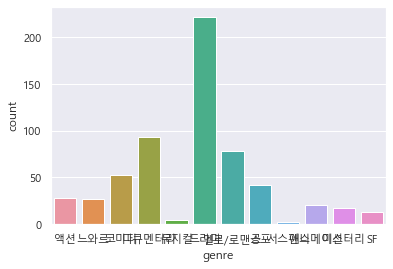

In [205]:
sns.countplot(x = 'genre', data = movie_train)

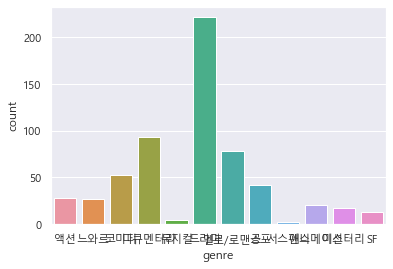

In [206]:
sns.countplot(x = 'genre', data = movie_train)

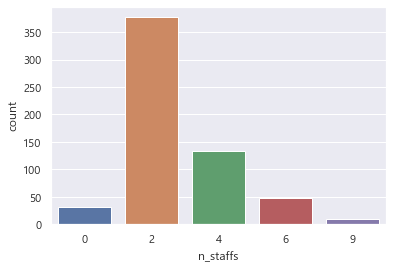

In [207]:
# 각 스테프별 영역별 영화의 수
sns.countplot(x = 'n_staffs', data = movie_train)

## 각 스태프 군집별 관객의 수

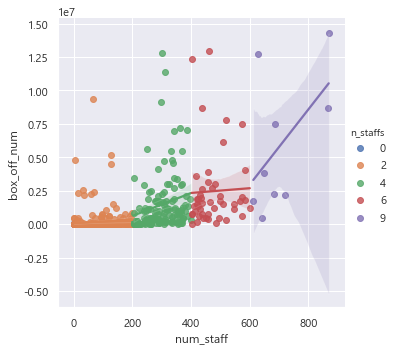

In [208]:
# 각 스테프별 영역별 사람의 수
sns.lmplot('num_staff', 'box_off_num', hue = 'n_staffs', data = movie_train)

## Dist Plot - 

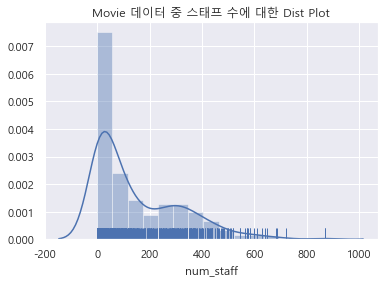

In [209]:

x = movie_train['num_staff']
sns.distplot(x, kde=True, rug=True)
plt.title("Movie 데이터 중 스태프 수에 대한 Dist Plot")
plt.show()

# 각 변수에 대한 상관관계 Heatmap - time, num_staff ↑

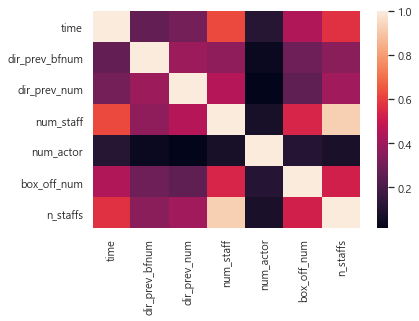

In [210]:
sns.heatmap(movie_train.corr())

In [211]:
movie_train.sort_values(by = ['box_off_num'], ascending = False)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,n_staffs
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,0.000000e+00,0,869,4,14262766,9
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2.564692e+06,3,462,10,12983841,6
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,8.190495e+05,2,300,8,12811435,4
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5.169479e+06,4,628,3,12706663,9
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1.552541e+06,2,402,3,12323595,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,려수,(주) 영화사조제,드라마,2011-11-10,98,15세 관람가,진광교,0.000000e+00,0,1,2,36,2
410,전망 좋은 방-밀애,(주) 케이알씨지,멜로/로맨스,2012-11-08,71,청소년 관람불가,이세일,0.000000e+00,0,0,3,10,0
338,타부 : 금지된 사랑,고구마공작소,멜로/로맨스,2015-09-03,78,청소년 관람불가,고구마,1.761531e+07,1,27,3,8,2
324,청아,인피니티엔터테인먼트,드라마,2014-09-25,92,청소년 관람불가,김정호,0.000000e+00,0,3,4,2,2


In [173]:
movie_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    int32  
 1   distributor     600 non-null    int64  
 2   genre           600 non-null    int64  
 3   release_time    600 non-null    int64  
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    int64  
 6   director        600 non-null    int64  
 7   dir_prev_bfnum  600 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
 12  n_staffs        600 non-null    int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 58.7 KB


In [176]:

for i in ranage(movie_train.index) :
    p = movie_train[i]['release_time'].split('-')
    year= p[0]
    month= p[1]
    day= p[2]

RangeIndex(start=0, stop=600, step=1)

In [212]:
movie_train ['release_time_Year'] =1
movie_train['release_time_Month'] = 1
movie_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,n_staffs,release_time_Year,release_time_Month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2,1,1
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,4,1,1
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,4,1,1
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2,1,1
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,4,1,1


In [213]:
for i, j in enumerate(movie_train["release_time"]) :
    movie_train["release_time_Year"][i] = j.split("-")[0]
    movie_train["release_time_Month"][i] = j.split("-")[1]

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [214]:
movie_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,n_staffs,release_time_Year,release_time_Month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,4,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,4,2013,6
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2,2012,7
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,4,2010,11


# Label Encoding 전 Dataframe 복사 → train

In [216]:
train = movie_train.copy()
train.head(2)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,n_staffs,release_time_Year,release_time_Month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,4,2015,11


In [217]:
for i in ['title', 'distributor', 'genre', 'release_time', 'screening_rat',
         'director'] :
    encoder = LabelEncoder()
    encoder.fit(train[i])
    train[i] = encoder.transform(train[i])
    train.head()

In [218]:
train.head(2)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,n_staffs,release_time_Year,release_time_Month
0,30,80,10,142,96,3,393,0.0,0,91,2,23398,2,2012,11
1,119,21,2,319,130,3,252,1161602.5,2,387,3,7072501,4,2015,11


# 복사한 train data standard scaler

In [219]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(train)
First_scaled = scaler.transform(train)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame로 변환
First_df_scaled = pd.DataFrame(data=First_scaled, columns=list(train.columns))

print('feature들의 평균값')
print(First_df_scaled.mean())
print('\nfeature들의 분산값')
print(First_df_scaled.var())

feature들의 평균값
title                 3.561966e-17
distributor           0.000000e+00
genre                 1.517305e-17
release_time          1.017704e-16
time                  1.661634e-16
screening_rat        -3.441691e-17
director             -4.200344e-17
dir_prev_bfnum       -3.386180e-17
dir_prev_num         -1.565414e-16
num_staff            -6.994405e-17
num_actor             8.252658e-17
box_off_num          -2.738550e-17
n_staffs              9.362881e-17
release_time_Year     6.498205e-14
release_time_Month   -9.251859e-18
dtype: float64

feature들의 분산값
title                 1.001669
distributor           1.001669
genre                 1.001669
release_time          1.001669
time                  1.001669
screening_rat         1.001669
director              1.001669
dir_prev_bfnum        1.001669
dir_prev_num          1.001669
num_staff             1.001669
num_actor             1.001669
box_off_num           1.001669
n_staffs              1.001669
release_time_Year     1.0016

In [221]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(train)
Second_scaled = scaler.transform(train)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame로 변환
Second_df_scaled = pd.DataFrame(data=Second_scaled, columns=list(train.columns))
print('feature들의 평균값')
print(Second_df_scaled.mean())
print('\nfeature들의 분산값')
print(Second_df_scaled.var())

feature들의 평균값
title                 3.561966e-17
distributor           0.000000e+00
genre                 1.517305e-17
release_time          1.017704e-16
time                  1.661634e-16
screening_rat        -3.441691e-17
director             -4.200344e-17
dir_prev_bfnum       -3.386180e-17
dir_prev_num         -1.565414e-16
num_staff            -6.994405e-17
num_actor             8.252658e-17
box_off_num          -2.738550e-17
n_staffs              9.362881e-17
release_time_Year     6.498205e-14
release_time_Month   -9.251859e-18
dtype: float64

feature들의 분산값
title                 1.001669
distributor           1.001669
genre                 1.001669
release_time          1.001669
time                  1.001669
screening_rat         1.001669
director              1.001669
dir_prev_bfnum        1.001669
dir_prev_num          1.001669
num_staff             1.001669
num_actor             1.001669
box_off_num           1.001669
n_staffs              1.001669
release_time_Year     1.0016

# 복사한 데이터 모델 선택

In [222]:
y_movie_df = train['box_off_num']
X_movie_df = train.drop('box_off_num', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_movie_df, y_movie_df, test_size=0.2, random_state=12)
#  test과 train을 나눈다.   
# X_titanic_df : 입력 값에 대한 것,  y_titanic_df : 결과 값에 대한 것
# 전체에서 테스트할 데이터 양 = 20%, 
# random_state 지정하먄 일정하게 유지 지정안하면 계속 갈라진다. 

print(X_train.shape) # 테스트 뺴고 난 나머지를 학습한다. 
print(X_test.shape)  #테스트용 데이터 임의로 뽑아 테스트할것 나온 결과 값을 가지고 실제 값과 비교
print(y_train.shape)
print(y_test.shape)
# 학습용 x, y  데이터
# 테스트용 x, y 데이터
#생존율 결과y를 예측하는 머신러닝을 짜주는 것

(480, 14)
(120, 14)
(480,)
(120,)


In [223]:
y_train # 결과값만 있는 것
#xtest값을 ytr

281     17444
571     35348
543    431310
421      3099
85       2296
        ...  
432         1
259    225839
241     11263
253      1556
390      3591
Name: box_off_num, Length: 480, dtype: int64

# 복사한 df 머신러닝 모델 - 분류(Classification) 
#### 머신러닝 기법이자 모델
- DecisionTree
- RandomForestTree
- LogicRegression

In [224]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  #채점 자동으로 매겨주는 것

# 결정트리, Random forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [225]:
# Descion Tree 학습=fit / 예측 =predict 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('Decision Tree Classifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

Decision Tree Classifier 정확도 : 0.0000


In [226]:
# RandomForestTree 학습 예측 평가

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('Random forest Classifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))



Random forest Classifier 정확도 : 0.0083


In [227]:
#Logicstic Regression 학습 예측 평가

lr_clf.fit(X_train, y_train)
ir_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, ir_pred)))

LogisticRegression 정확도 : 0.0000


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [229]:
# K - fold
##
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    # KFold 교차 검증 수행.
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_movie_df )): #y변수 Survived 뺴고 나머지를 5개로 나눠
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_movie_df.values[train_index], X_movie_df.values[test_index]
        y_train, y_test = y_movie_df.values[train_index], y_movie_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
    # 5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

# exec_kfold 호출
exec_kfold(rf_clf, folds=5)

# exec_kfold 호출
exec_kfold(lr_clf, folds=5)


교차 검증 0 정확도: 0.0000
교차 검증 1 정확도: 0.0083
교차 검증 2 정확도: 0.0000
교차 검증 3 정확도: 0.0083
교차 검증 4 정확도: 0.0000
평균 정확도: 0.0033
교차 검증 0 정확도: 0.0000
교차 검증 1 정확도: 0.0083
교차 검증 2 정확도: 0.0000
교차 검증 3 정확도: 0.0083
교차 검증 4 정확도: 0.0000
평균 정확도: 0.0033


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


교차 검증 0 정확도: 0.0000


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


교차 검증 1 정확도: 0.0000


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


교차 검증 2 정확도: 0.0000


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


교차 검증 3 정확도: 0.0000
교차 검증 4 정확도: 0.0000
평균 정확도: 0.0000


C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [234]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [247]:
y_predict = mlr.predict(X_test)

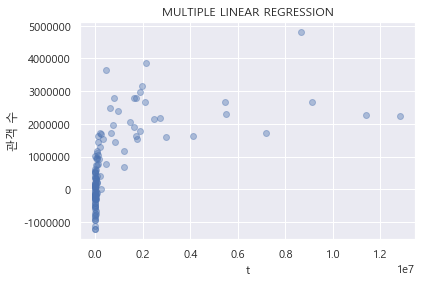

In [248]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("t")
plt.ylabel("관객 수")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [249]:
#회귀 계수
print(mlr.coef_)

[-7.90988620e+01 -3.16816418e+03 -2.09234067e+03 -3.11702180e+04
  1.24324606e+04 -8.46098802e+04  7.53331957e+02  1.61231505e-01
 -1.94572739e+04  2.49573142e+03  3.59834646e+04  2.44471226e+05
  1.71514804e+06  1.68351026e+05]


In [263]:
# RSS(residual sum of square)
((y_test - y_predict) ** 2).sum()

374171365962040.0

In [264]:
((y - y.mean()) ** 2).sum()

2001621629697688.0

In [265]:
print(mlr.score(X_train, y_train))

0.3765737519746316


In [266]:
print('a value = ', mlr.intercept_)
print('b value = ', mlr.coef_)

a value =  -3449692647.10025
b value =  [-7.90988620e+01 -3.16816418e+03 -2.09234067e+03 -3.11702180e+04
  1.24324606e+04 -8.46098802e+04  7.53331957e+02  1.61231505e-01
 -1.94572739e+04  2.49573142e+03  3.59834646e+04  2.44471226e+05
  1.71514804e+06  1.68351026e+05]


In [269]:
residuals = y_predict

# 우리 적합도가 높아유

In [272]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.8863439403208557


KeyError: "None of [Int64Index([ 91, 387, 343,  20, 251, 262,  32, 342,   3, 138,\n            ...\n             92,  59, 420,   5,  37, 510, 286, 123, 431, 363],\n           dtype='int64', length=600)] are in the [columns]"

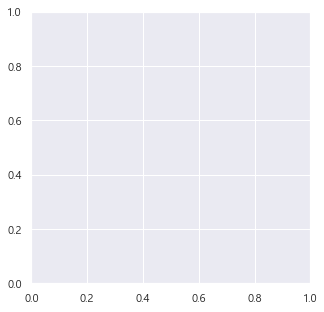

In [282]:
train.plot(kind = "scatter", x = train["num_staff"], y = y_predict, figsize = (5, 5), color = "black")

#Plot regression line
plt.plot(train["num_staff"],prediction,color="blue")

In [279]:
print(y_predict)

[ 2663575.61941051  2800496.78534555  1109408.67969894  -735399.94239235
  1918356.08511305  -262771.77226448  -884280.05344629  2781806.38030005
   201936.61397505    42279.29684258  -669612.03657293   531091.02873421
  1169714.22189045   625906.74457121  -301675.85534573  2981748.26717281
   569149.7833209   -193374.63215971  3643961.88701534  3845521.84434891
   392578.54406118  1431118.7637639   3166072.70565319  -590586.33291101
    75493.8592329    133050.341784    2280062.38312864   104137.8956356
   755370.12393093  1720548.75273848    85508.47628927  1015256.3447032
   317860.325109    2043015.47242928  -295340.78987932 -1207411.40356588
  1612979.11760664  -165414.3274641   -326827.71246195  -301432.46538353
  -246508.05107069  2675298.34193039    50941.50840187  2178789.19932699
   527237.52143526  -419743.28555965  -499514.28466988  2487149.78705549
   198048.33443165  1782940.38398981  -268591.79778004   667332.14642811
  -930936.86447716   733524.03829336   342681.2460999